Step 1 – Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

Step 2 – Load Dataset

In [2]:
file = "workout_fitness_tracker_data.csv"
df = pd.read_csv(file)
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


Step 3 – Data Cleaning & Feature Encoding

In [3]:
df = df.drop('User ID', axis=1)
df = pd.get_dummies(df, columns=['Gender', 'Workout Type'])
le = LabelEncoder()
df['Workout Intensity'] = le.fit_transform(df['Workout Intensity'])
before_map = {
    'Tired': 0,
    'Stressed': 0,
    'Neutral': 1,
    'Happy': 2
}
after_map = {
    'Fatigued': 0,
    'Neutral': 1,
    'Energized': 2
}

df['Mood Before Workout'] = df['Mood Before Workout'].map(before_map)
df['Mood After Workout'] = df['Mood After Workout'].map(after_map)
df.head()

,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,...,Mood After Workout,Gender_Female,Gender_Male,Gender_Other,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga
0,39,175,99,79,384,112,8850,14.44,0,8.2,...,0,False,True,False,False,True,False,False,False,False
1,36,157,112,73,612,168,2821,1.10,0,8.6,...,2,False,False,True,True,False,False,False,False,False
2,25,180,66,27,540,133,18898,7.28,0,9.8,...,0,True,False,False,False,False,True,False,False,False
3,56,154,89,39,672,118,14102,6.55,2,5.8,...,1,False,True,False,False,True,False,False,False,False
4,53,194,59,56,410,170,16518,3.17,2,7.3,...,2,False,False,True,False,False,False,False,True,False


Step 4 – Feature Scaling

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Step 5 – Dimensionality Reduction (PCA)

In [5]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

Step 6 – Apply k-Means Clustering

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca)
df['Cluster'] = clusters

Step 7 – Cluster Evaluation (Silhouette Score)

In [7]:
score = silhouette_score(df_pca, clusters)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.91


Step 8 – Visualize Clusters in PCA Space

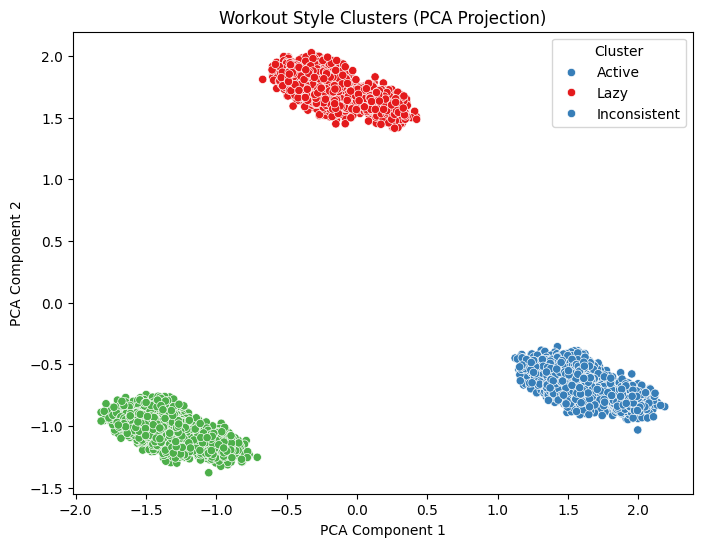

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_pca[:,0], y=df_pca[:,1], hue=clusters, palette='Set1')
plt.title("Workout Style Clusters (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', labels=['Active', 'Lazy', 'Inconsistent'])
plt.show()